# Fundamentos em Data Science

## Métricas para Regressão

Fábio Sato - <fabiosato@gmail.com>

# Erro Médio Absoluto (MAE)

O Erro Médio Absoluto (MAE - Mean Absolute Error) é obtido através da soma das diferenças absolutas entre as
estimativas e os valores verdadeiros.

$$ MAE = \frac{\sum_{i=1}^{n}{\lvert \widehat{y}_i - y_i \rvert}}{n}$$

Fornece uma medição de quão errados estão as estimativas, mas não dá uma idéia de direção/viés.

Um valor igual a 0 indica nenhum erro ou estimativas perfeitas.

# MAE - Exemplo

In [20]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

kfold = model_selection.KFold(n_splits=10, random_state=1234)

model = RandomForestRegressor(n_estimators=10)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(results)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

[-2.52019608 -1.5627451  -1.99960784 -3.81058824 -2.75960784 -3.43490196
 -2.4066     -6.2698     -3.706      -3.2196    ]
MAE: -3.169 (1.245)


# Erro Médio Quadrático - MSE e RMSE

O Erro Médio Quadrático (MSE - Mean Squared Error) assim como o MAE fornece uma idéia da magnitude dos erros

RMSE (Root Mean Squared Error): a raiz quadrada do erro quadrático converte as unidades do erro à unidade original da variável alvo.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}{(\mathbf{Y} - \mathbf{\widehat{Y}})^2} $$

In [22]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
y = boston.target

kfold = model_selection.KFold(n_splits=10, random_state=1234)

model = RandomForestRegressor(n_estimators=10)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(results)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

[ -11.61026275   -5.88680784   -6.13859216  -23.23854902  -11.33661176
  -22.06632157   -7.458582   -100.829632    -27.651092    -14.90422   ]
MSE: -23.112 (26.888)


#  Coeficiente de Determinação - $R^2$

O $R^2$ fornece um indicativo da qualidade do ajuste de um conjunto de estimativas aos valores observados.

Na literatura estatística $R^2$ é chamado de coeficiente de determinação.

Este é um valor que varia entre 0 e 1. 0 representa nenhum ajuste e 1 ajuste perfeito.



#  $R^2$ - Soma Total dos Quadrados

Soma total dos quadrados: soma dos quadrados das diferenças entre a média e cada valor observado.

$$ SQ_{tot} = \sum_{i=1}^{n}{(y_i - \bar{y})^2} $$

# $R^2$ - Soma dos Quadrados Explicada

Indica a diferença entre a média das observações e o valor estimado para cada observação, e soma os respectivos quadrados. Quanto menor for a diferença, maior poder explicativo detém o modelo.
$$ SQ_{exp} = \sum_{i=1}^{n}{(\hat{y_i} - \bar{y})^2} $$

# $R^2$ - Soma dos quadrados dos Resíduos

Calcula a parte que não é explicada pelo modelo.

$$ SQ_{res} = \sum_{i=1}^{n}{(y_i - \hat{y_i})} $$

# $R^2$ - Fórmulas

O $R^2$ pode ser calculado das seguintes formas:

$$ R^2 = \frac{SQ_{exp}}{SQ_{tot}} = 1 - \frac{SQ_{res}}{SQ_{tot}} $$

# Exercício

Treine o algoritmo de regressão linear para o conjunto de dados Boston utilizando $R^2$ como métrica de treinamento

<http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter>

In [28]:
from sklearn import model_selection
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

boston = load_boston()

X = boston.data
y = boston.target

kfold = model_selection.KFold(n_splits=10, random_state=1234)

model = RandomForestRegressor(n_estimators=1000)
scoring = 'r2'

cv = GridSearchCV(estimator=model, scoring='r2', cv=10, param_grid={})
cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [29]:
y_pred = cv.predict(X)

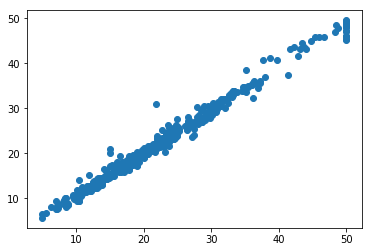

In [30]:
plt.scatter(y, y_pred)

In [31]:
print(cv.best_score_)

0.493360111658
